# Task1 CreditCard_Data.csv

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



In [3]:
credit = pd.read_csv("CreditCard_Data.csv")
credit.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Y
0,1,290000,0,0,0,2262,5205,8114,0,0,2262,3000,3000,0,1
1,2,90000,32755,31325,28034,29753,30601,33083,2000,3000,2000,3000,3000,1000,0
2,3,120000,22462,15692,19312,13262,16923,16903,5000,10000,5000,7000,5000,10000,0
3,4,140000,1536,696,696,696,696,696,696,696,696,696,696,696,1
4,5,100000,89296,101755,90684,23000,25000,0,14002,560,0,2000,0,53528,0


In [4]:
# Create subset of data to keep a copy of original dataframe
df = credit.copy()

In [5]:
df.isnull().any()

Unnamed: 0    False
X1            False
X2            False
X3            False
X4            False
X5            False
X6            False
X7            False
X8            False
X9            False
X10           False
X11           False
X12           False
X13           False
Y             False
dtype: bool

In [6]:
# Drop first column, the index is not nessesary 
df = df.drop(columns=["Unnamed: 0"])
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Y
0,290000,0,0,0,2262,5205,8114,0,0,2262,3000,3000,0,1
1,90000,32755,31325,28034,29753,30601,33083,2000,3000,2000,3000,3000,1000,0
2,120000,22462,15692,19312,13262,16923,16903,5000,10000,5000,7000,5000,10000,0
3,140000,1536,696,696,696,696,696,696,696,696,696,696,696,1
4,100000,89296,101755,90684,23000,25000,0,14002,560,0,2000,0,53528,0


In [7]:
# Separate features and target variable
X = df.drop(columns=['Y'])
y = df['Y']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
num_of_column = X_train.shape[1]
print(num_of_column)

13


In [11]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(num_of_column,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

C:\Users\Baicha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Train the model
history = model.fit(
    X_train, y_train, 
    epochs=100, 
    batch_size=32, 
    validation_split=0.2, 
    callbacks=early_stopping)

Epoch 1/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5568 - loss: 0.7102 - val_accuracy: 0.6182 - val_loss: 0.6592
Epoch 2/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6045 - loss: 0.6625 - val_accuracy: 0.6244 - val_loss: 0.6515
Epoch 3/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6389 - loss: 0.6414 - val_accuracy: 0.6182 - val_loss: 0.6470
Epoch 4/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6336 - loss: 0.6446 - val_accuracy: 0.6258 - val_loss: 0.6414
Epoch 5/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6335 - loss: 0.6375 - val_accuracy: 0.6272 - val_loss: 0.6386
Epoch 6/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6291 - loss: 0.6407 - val_accuracy: 0.6382 - val_loss: 0.6335
Epoch 7/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6263 - loss: 0.6439 - val_accuracy: 0.6465 - val_loss: 0.6283
Epoch 8/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6412 - loss: 0.6367 - val_accu

In [14]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on the test set (if needed)
y_pred = model.predict(X_test)

# Convert probabilities to binary outcomes if using sigmoid activation
y_pred_classes = (y_pred > 0.5).astype(int)


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.6934 - loss: 0.6040
Test Loss: 0.5996590256690979
Test Accuracy: 0.6935691237449646
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


# Task2 OilPrice.csv

# ARIMA

In [16]:
# Load the data
file_path = 'OilPrice.csv'
oil_data = pd.read_csv(file_path)

In [17]:
#oil_data['DCOILBRENTEU'] = pd.to_numeric(oil_data['DCOILBRENTEU'])
oil_data['DCOILBRENTEU'] = pd.to_numeric(oil_data['DCOILBRENTEU'], errors='coerce')
oil_data['DATE'] = pd.to_datetime(oil_data['DATE'], format='%d/%m/%Y', errors='coerce')

 (a) Plot oil price and its returns. Comment on the dynamic movement of the Brent oil
 price and its returns. (2 marks)

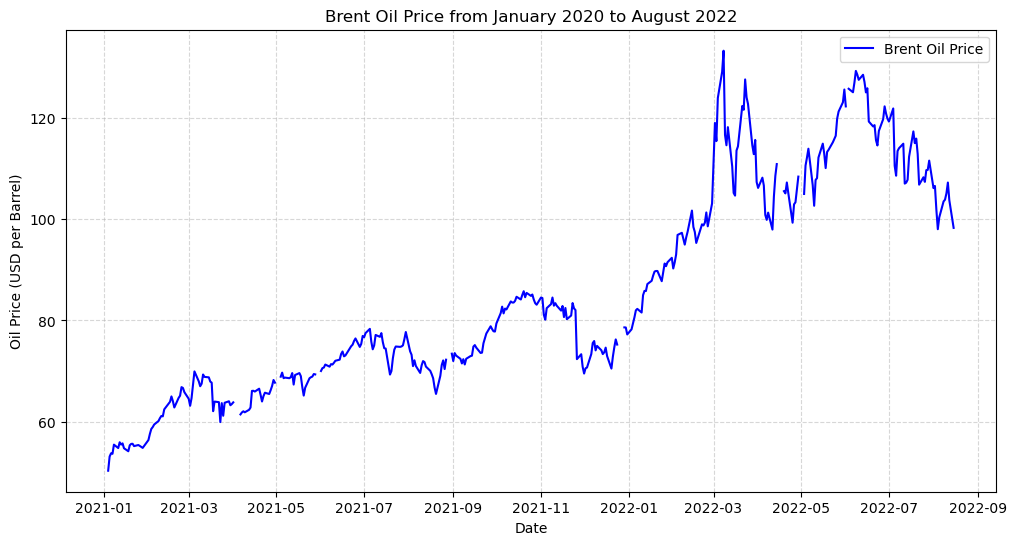

In [19]:
import matplotlib.pyplot as plt

# Plot the oil price
plt.figure(figsize=(12, 6))
plt.plot(oil_data['DATE'], oil_data['DCOILBRENTEU'], color='blue', label='Brent Oil Price')
plt.title('Brent Oil Price from January 2020 to August 2022')
plt.xlabel('Date')
plt.ylabel('Oil Price (USD per Barrel)')
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()



(b) Proposing an approach to handle with missing values. (1 marks)

In [21]:
# Check for any potential missing values after conversion
missing_values = oil_data.isnull().sum()
print(missing_values)

DATE             0
DCOILBRENTEU    11
dtype: int64


In [22]:
oil_data['DCOILBRENTEU'] = oil_data['DCOILBRENTEU'].bfill()

In [23]:
# Check for any potential missing values after conversion
missing_values = oil_data.isnull().sum()
print(missing_values)

DATE            0
DCOILBRENTEU    0
dtype: int64


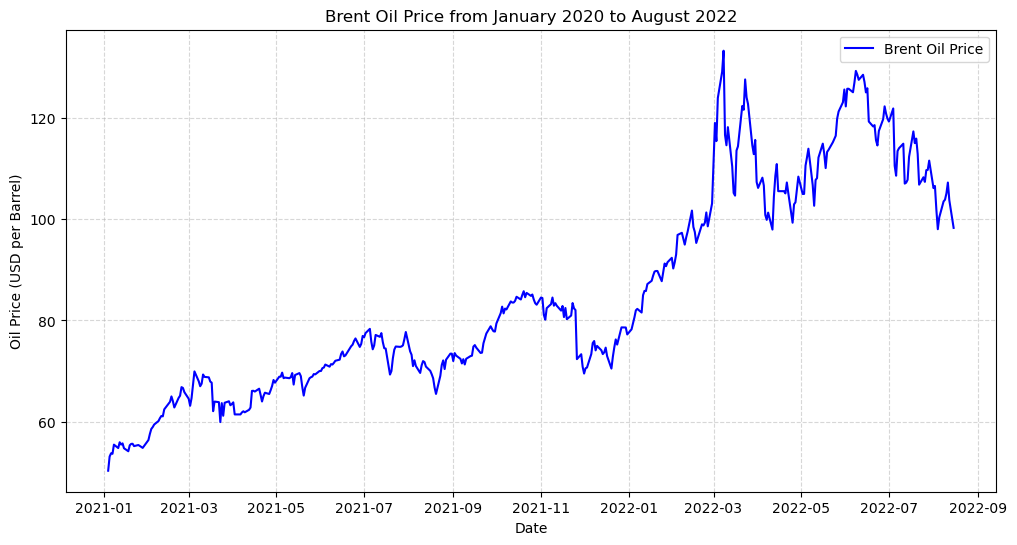

In [24]:
# Plot the oil price
plt.figure(figsize=(12, 6))
plt.plot(oil_data['DATE'], oil_data['DCOILBRENTEU'], color='blue', label='Brent Oil Price')
plt.title('Brent Oil Price from January 2020 to August 2022')
plt.xlabel('Date')
plt.ylabel('Oil Price (USD per Barrel)')
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

 (c) Use the data up to 29th July 2022 as the training dataset. Propose an ARMA(p,q)/
 ARIMA (p,d,q) model to t the training dataset. Justify your choice. (4 marks)
 - The first step to build an ARIMA model is to make the time series stationary. Dickey-Fuller (ADF) Test: Perform this test to check for stationarity.

In [26]:
from datetime import datetime

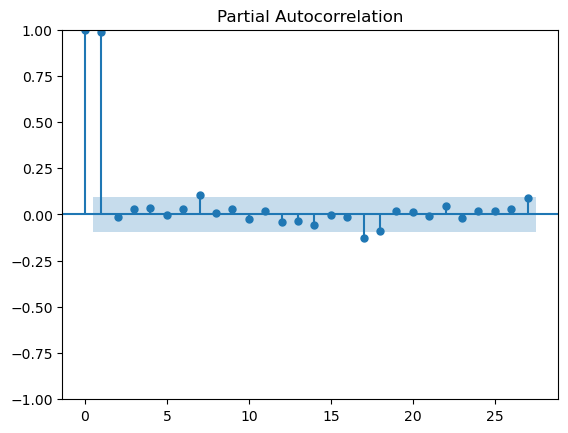

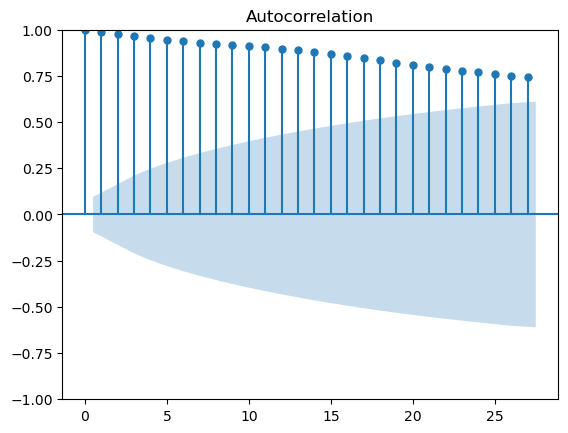

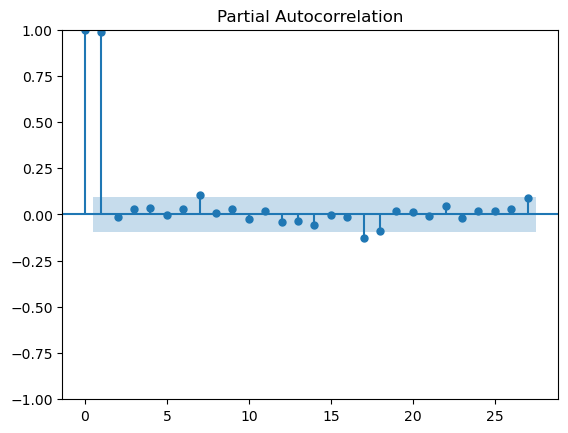

In [27]:
# PACF and ACF

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(oil_data['DCOILBRENTEU']) # indicate q
plot_pacf(oil_data['DCOILBRENTEU']) # indicate p

The PACF is primarily used to determine the order of the AutoRegressive (AR) component 'p'in an ARIMA model. 
A sharp cutoff after lag 2 suggests that 𝑝 = 2

In [29]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(oil_data['DCOILBRENTEU'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.7643120177485523
p-value: 0.39831812105197634


Since p-value is quite large (39%) , much larger than a significan level of 5%, we conclude do not reject Ho. Thus there is a chance that
 Ln(GDP) is non-stationary. 

After apply differencing, we plot ACF one more time.

In [32]:
# Apply differencing
oil_data['DCOILBRENTEU_diff'] = oil_data['DCOILBRENTEU'].diff()
oil_data_cleaned = oil_data.dropna()
print(oil_data_cleaned)

          DATE  DCOILBRENTEU  DCOILBRENTEU_diff
1   2021-01-05         53.16               2.79
2   2021-01-06         53.80               0.64
3   2021-01-07         53.70              -0.10
4   2021-01-08         55.51               1.81
5   2021-01-11         54.84              -0.67
..         ...           ...                ...
416 2022-08-09        103.81               0.35
417 2022-08-10        105.06               1.25
418 2022-08-11        107.19               2.13
419 2022-08-12        103.70              -3.49
420 2022-08-15         98.25              -5.45

[420 rows x 3 columns]


In [33]:
oil_data_cleaned['DCOILBRENTEU_diff'].isna().sum()

0

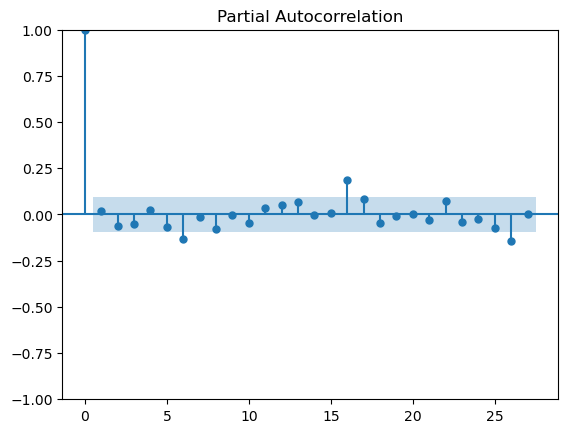

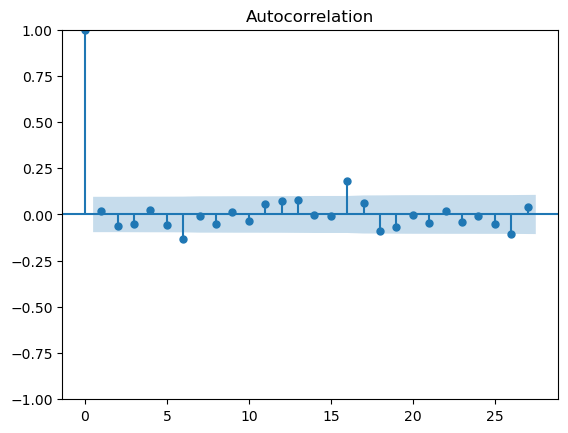

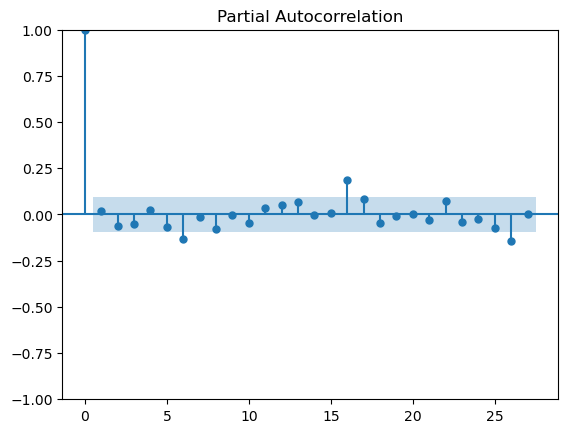

In [34]:
# Plot ACF and PACF on the differenced data
plot_acf(oil_data_cleaned['DCOILBRENTEU_diff']) # indicate q
plot_pacf(oil_data_cleaned['DCOILBRENTEU_diff']) # indicate p

This PACF pattern suggests an AR(1) process might be a good candidate for modeling the time series since only the first lag is significant.
q = 1, as there is only one significant autocorrelation at lag 1. This suggests a Moving Average process of order 1 (MA(1)).
The ACF suggests that the time series may follow a process with strong short-term correlation but lacks long-term dependencies. 
Combined with the PACF plot, this further supports an AR(1) or potentially a simple model like a random walk with drift.

In [36]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(oil_data_cleaned['DCOILBRENTEU_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -3.5294902239449435
p-value: 0.00726124688323325


With these output we can confirm that our model is stationary

In [38]:
# Split the data into training and test sets based on the given date
split_date = datetime(2022, 7, 29)
training_data = oil_data_cleaned[oil_data_cleaned['DATE'] <= split_date]
test_data = oil_data_cleaned[oil_data_cleaned['DATE'] > split_date]

In [123]:
# Fit ARIMA/ARMA model
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(training_data['DCOILBRENTEU'], order=(1, 1, 1)).fit() # order = (p, d, q)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:           DCOILBRENTEU   No. Observations:                  409
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -952.902
Date:                Tue, 26 Nov 2024   AIC                           1911.803
Time:                        21:27:40   BIC                           1923.837
Sample:                             0   HQIC                          1916.565
                                - 409                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8015      0.151      5.294      0.000       0.505       1.098
ma.L1         -0.8476      0.134     -6.330      0.000      -1.110      -0.585
sigma2         6.2537      0.233     26.882      0.0

In [40]:
# Forecast for the test set
forecast = model.forecast(steps=len(test_data['DCOILBRENTEU']))

# Evaluate the model
rmse = np.sqrt(mean_squared_error(test_data['DCOILBRENTEU'], forecast))
mae = mean_absolute_error(test_data['DCOILBRENTEU'], forecast)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


RMSE: 8.868096387400689
MAE: 8.329445514349873


C:\Users\Baicha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Baicha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [85]:
# Back Testing for ARIMA
one_day_ahead_forecasts = []
two_day_ahead_forecasts = []

# Convert training and test data to numpy arrays for indexing
training_series = training_data['DCOILBRENTEU'].values
test_series = test_data['DCOILBRENTEU'].values

# Rolling forecast
train = list(training_series)  # Start with the training data
test_size = len(test_series)

for t in range(test_size):
    # Fit ARIMA model on the current training data
    model = sm.tsa.statespace.SARIMAX(train, order=(1, 1, 5)).fit(disp=False)
    
    # Generate 1-day and 2-day-ahead forecasts
    forecast = model.forecast(steps=2)
    one_day_ahead_forecasts.append(forecast[0])  # Forecast for the next day
    if t + 1 < test_size:  # Ensure we don't go out of bounds for 2-day-ahead
        two_day_ahead_forecasts.append(forecast[1])
    
    # Update the training set with the actual observed value
    train.append(test_series[t])

# Evaluate 1-day-ahead forecasts
rmse_1_day = np.sqrt(mean_squared_error(test_series[:test_size], one_day_ahead_forecasts))
mae_1_day = mean_absolute_error(test_series[:test_size], one_day_ahead_forecasts)

print(f"1-Day-Ahead Forecast RMSE: {rmse_1_day}")
print(f"1-Day-Ahead Forecast MAE: {mae_1_day}")

# Evaluate 2-day-ahead forecasts
# Note: Start comparing at t=1 since 2-day-ahead forecasts start from the second point
rmse_2_day = np.sqrt(mean_squared_error(test_series[1:test_size], two_day_ahead_forecasts))
mae_2_day = mean_absolute_error(test_series[1:test_size], two_day_ahead_forecasts)

print(f"2-Day-Ahead Forecast RMSE: {rmse_2_day}")
print(f"2-Day-Ahead Forecast MAE: {mae_2_day}")


1-Day-Ahead Forecast RMSE: 3.392586458466419
1-Day-Ahead Forecast MAE: 2.8510879367658877
2-Day-Ahead Forecast RMSE: 5.061149968553915
2-Day-Ahead Forecast MAE: 4.322490631838919


# LSTM

In [99]:
# Ensure 'prices' is a NumPy array
prices = oil_data['DCOILBRENTEU'].values

# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1))

# Split into train and test sets
train_size = int(len(prices_scaled) * 0.8)  # 80% train, 20% test
train, test = prices_scaled[:train_size], prices_scaled[train_size:]

# Create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10  # Adjust based on the series' characteristics
X_train, y_train = create_sequences(train, sequence_length)
X_test, y_test = create_sequences(test, sequence_length)

# Reshape X_train and X_test for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [101]:
# Initialize the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(sequence_length, 1)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50


C:\Users\Baicha\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0749 - val_loss: 0.0229
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - val_loss: 0.0035
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - val_loss: 0.0161
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - val_loss: 0.0035
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - val_loss: 0.0036
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - val_loss: 0.0036
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - val_loss: 0.0035
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - val_loss: 0.0035
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - val_loss: 0.0035
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - val_loss: 0.0034
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - val_loss: 0.0033

In [111]:
# Predict on the test set
lstm_model = model.predict(X_test)

# Rescale predictions and actual values back to original scale
lstm_model_rescaled = scaler.inverse_transform(lstm_model)
y_test_rescaled = scaler.inverse_transform(y_test)

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test_rescaled, lstm_model_rescaled))
mae = mean_absolute_error(y_test_rescaled, lstm_model_rescaled)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE: 4.322824936058191
MAE: 3.4123854939778653


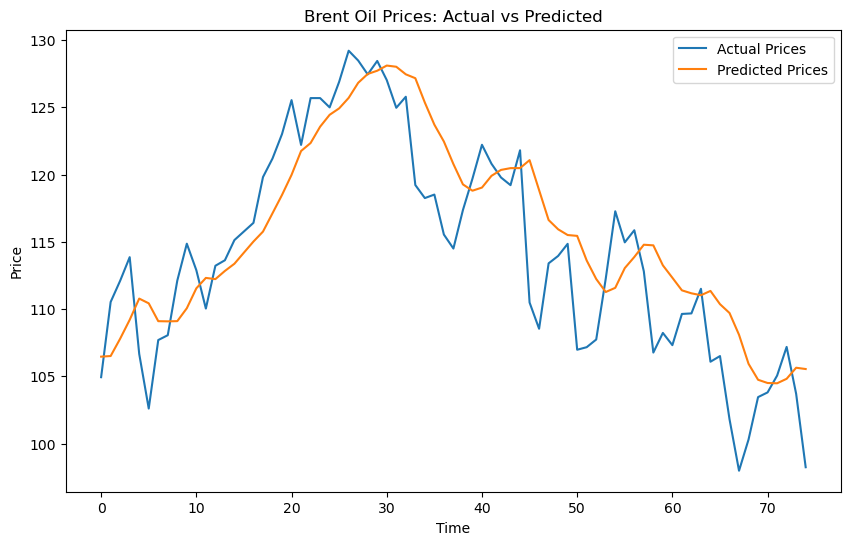

In [109]:
# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual Prices')
plt.plot(lstm_model_rescaled, label='Predicted Prices')
plt.title('Brent Oil Prices: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [121]:
# Backtesting loop for 1-step-ahead forecasts
predictions = []
rolling_train = list(train.flatten())  # Flatten to ensure it's a 1D list

for t in range(len(test) - sequence_length):
    # Create rolling sequence for prediction
    X_rolling = np.array(rolling_train[-sequence_length:]).reshape((1, sequence_length, 1))  # Ensure correct shape

    # Predict the next step
    pred = model.predict(X_rolling, verbose=0)
    predictions.append(pred[0][0])  # Store the prediction

    # Append the true value from the test set for rolling sequence
    rolling_train.append(test[sequence_length + t][0])

# Rescale predictions and actual values back to original scale
predictions_rescaled = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
y_test_rescaled = scaler.inverse_transform(test[sequence_length:].reshape(-1, 1))

# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)

# Backtesting loop for 2-day-ahead forecasts
predictions_2day = []
rolling_train = list(train.flatten())  # Flatten to ensure it's a 1D list

for t in range(len(test) - sequence_length - 1):  # Leave room for a 2-step forecast
    # Create rolling sequence for prediction
    X_rolling = np.array(rolling_train[-sequence_length:]).reshape((1, sequence_length, 1))  # Ensure correct shape

    # Predict the next step (day 1 ahead)
    pred_1 = model.predict(X_rolling, verbose=0)
    
    # Append the first prediction to form the input for day 2 ahead
    rolling_input = rolling_train[-(sequence_length - 1):] + [pred_1[0][0]]
    X_rolling_2 = np.array(rolling_input).reshape((1, sequence_length, 1))  # Reshape for day 2

    # Predict the second step (day 2 ahead)
    pred_2 = model.predict(X_rolling_2, verbose=0)
    
    # Store the 2-day-ahead prediction
    predictions_2day.append(pred_2[0][0])

    # Append the true value from the test set for rolling sequence
    rolling_train.append(test[sequence_length + t][0])

# Rescale predictions and actual values back to original scale
predictions_2day_rescaled = scaler.inverse_transform(np.array(predictions_2day).reshape(-1, 1))
y_test_rescaled_2day = scaler.inverse_transform(test[sequence_length + 1:].reshape(-1, 1))

# Evaluate performance
rmse_2day = np.sqrt(mean_squared_error(y_test_rescaled_2day, predictions_2day_rescaled))
mae_2day = mean_absolute_error(y_test_rescaled_2day, predictions_2day_rescaled)

print(f"1-Day-Ahead-RMSE: {rmse}")
print(f"1-Day-Ahead-MAE: {mae}")
print(f"2-Day-Ahead RMSE: {rmse_2day}")
print(f"2-Day-Ahead MAE: {mae_2day}")


1-Day-Ahead-RMSE: 4.319515927423201
1-Day-Ahead-MAE: 3.411836381022136
2-Day-Ahead RMSE: 5.05538362207924
2-Day-Ahead MAE: 4.034389491725612


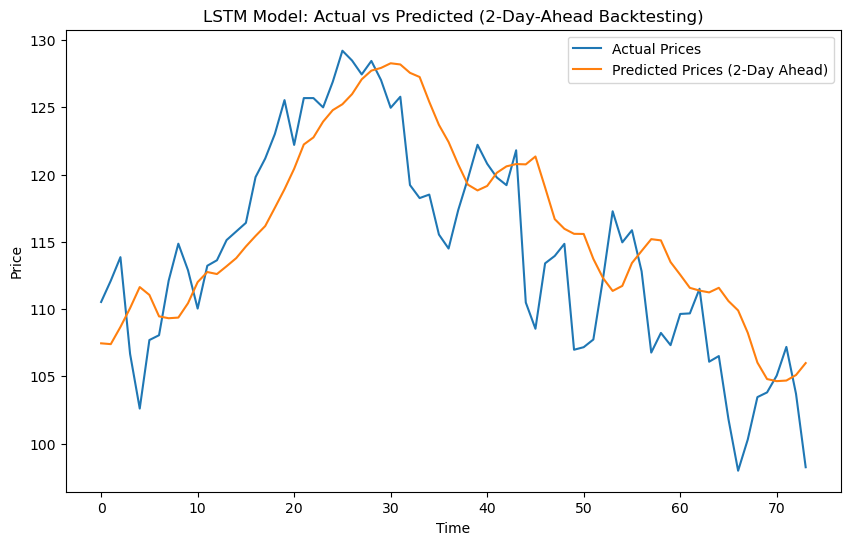

In [119]:
# Plot actual vs predicted prices
# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled_2day, label='Actual Prices')
plt.plot(predictions_2day_rescaled, label='Predicted Prices (2-Day Ahead)')
plt.title('LSTM Model: Actual vs Predicted (2-Day-Ahead Backtesting)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()